# Week 4 Exercise

# Exercise 1

1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015


In [3]:
import numpy as np
import matplotlib.pyplot as plt
#1-2
filename = '../data/befkbhalderstatkode.csv'
data = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

#print(data)
#3
population_dict = {}
for key, value in neighb.items():
    mask = (data[:,0] == 2015) & (data[:,1] == key)
    area = np.sum(data[mask][:,4])
    population_dict[value] = area
    print("Population in", value, "in 2015:",area)

Population in Indre By in 2015: 51937
Population in Østerbro in 2015: 75113
Population in Nørrebro in 2015: 78802
Population in Vesterbro/Kgs. Enghave in 2015: 61623
Population in Valby in 2015: 51727
Population in Vanløse in 2015: 39537
Population in Brønshøj-Husum in 2015: 43908
Population in Bispebjerg in 2015: 53604
Population in Amager Øst in 2015: 55205
Population in Amager Vest in 2015: 64967
Population in Udenfor in 2015: 3872


4. Make a bar plot to show the size of each city area from the smallest to the largest in 2015


<function matplotlib.pyplot.show(close=None, block=None)>

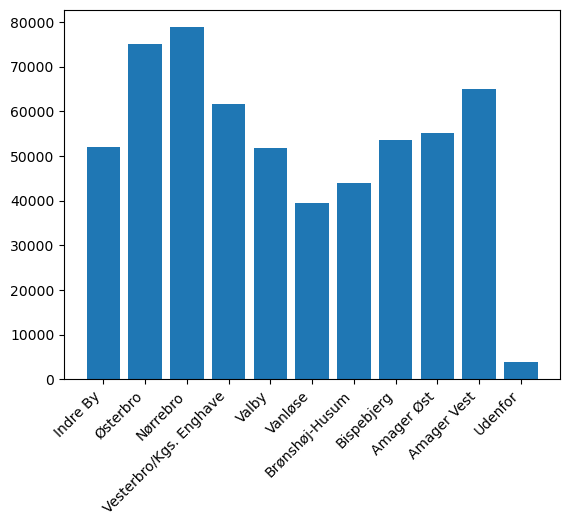

In [6]:
#4
plt.bar(population_dict.keys(), population_dict.values())
plt.xticks(rotation=45, horizontalalignment='right')
plt.show

5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015



In [60]:
#5
mask = (data[:,0] == 2015) & (data[:,2] > 65)
print("Number of people aged above 65 in cph in 2015:",np.sum(data[mask][:,4]))

Number of people aged above 65 in cph in 2015: 55750


6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"


In [62]:
#6
nordic_country_codes = [5101,5104,5106,5110,5120]
above65 = data[mask]
total = 0

for code in nordic_country_codes:
    country_mask = above65[:,3] == code
    total += np.sum(above65[country_mask][:,4])
print("number of people obove 65 in cph from other nordic countries:",total)

number of people obove 65 in cph from other nordic countries: 608.0


7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

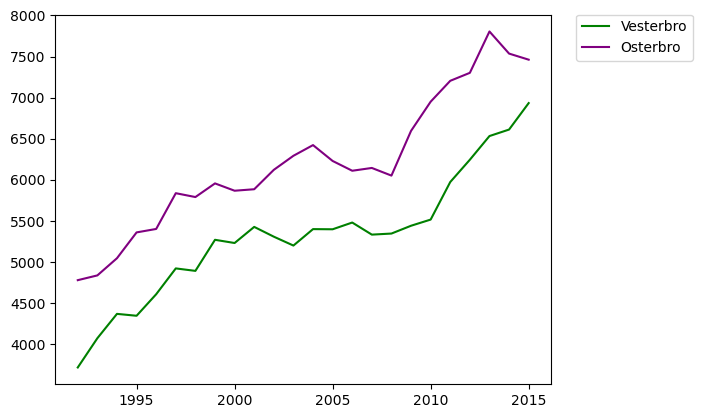

In [56]:
#7
vesterbro = {}
osterbro = {}

for i in range(1992,2016):
    mask = (data[:,0] == i) & (data[:,2] == 4)
    vesterbro[i] = np.sum(data[mask][:,4])
    
for j in range(1992,2016):
    mask = (data[:,0] == j) & (data[:,2] == 2)
    osterbro[j] = np.sum(data[mask][:,4])
    
vresult = list(vesterbro.values())
oresult = list(osterbro.values())

plt.plot(range(1992,2016),vresult, color="green", label="Vesterbro")
plt.plot(range(1992,2016),oresult, color="purple", label="Osterbro")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)